# HÒA PHÁT GROUP


In [24]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [25]:
# 2. Đọc file csv và gắng index với giá Price
df = pd.read_csv('HPG Historical Data.csv')
df1=df.reset_index()['Price']

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1313 non-null   object 
 1   Price     1313 non-null   float64
 2   Open      1313 non-null   object 
 3   High      1313 non-null   object 
 4   Low       1313 non-null   object 
 5   Vol.      1313 non-null   object 
 6   Change %  1313 non-null   object 
dtypes: float64(1), object(6)
memory usage: 71.9+ KB


In [27]:
df1.head()

0    28600.0
1    28250.0
2    28600.0
3    29150.0
4    28900.0
Name: Price, dtype: float64

In [28]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [29]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = int(0.3 * len(df1))

train_data = df1[:train_size]
test_data = df1[train_size:]

In [30]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [31]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
train_last_windowsize = train_data[-time_step-1:]
test_data_extended = np.concatenate((train_last_windowsize, test_data), axis=0)
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data_extended, time_step)


In [32]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [33]:
# 8. Define LSTM Model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

c:\Users\hangt\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [34]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 140s 436ms/step - loss: 0.1074
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0106
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0030
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0016
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0012
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0013
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0011
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0011
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0010
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 9.5688e-04
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 9.8838e-04
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 8.8092e-04
Epoch 13/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9.1611e-04
Epoch 14/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 9.4858e-04
Epoch 15/100
13/13 ━━━━━━━━━━━━━━━

In [35]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


In [36]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

In [37]:
ytest = scaler.inverse_transform(ytest.reshape(-1,1))

In [38]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 378.7416347954406


In [39]:
# Đánh giá độ chính xác thuật toán bằng MAE
test_mae = np.mean(abs(y_pred - ytest))
print('Testing MAE:', test_mae)

Testing MAE: 301.27944088079


In [40]:
# Đánh giá độ chính xác thuật toán bằng MAPE
test_mape = np.mean(np.abs(y_pred - ytest)/np.abs(y_pred))
print('Testing MAPE:', test_mape)

Testing MAPE: 0.02671533452800179


# Dự đoán

In [41]:
# 13. Dự báo 90 ngày tiếp theo dựa trên dữ liệu test
x_input = test_data[60:].reshape(1, -1)

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output_90 = []
n_steps = x_input.shape[1]
i = 0
while i < 90:

    if len(temp_input) > n_steps:
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output_90.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_90.extend(yhat.tolist())
        i = i + 1

[0.15630057]
335
1 day input [0.13104649 0.13794266 0.139198   0.13543471 0.13543471 0.139198
 0.13982294 0.13292676 0.12603059 0.12540292 0.11537112 0.12916347
 0.11662373 0.13543471 0.13668731 0.1442139  0.13606238 0.13041881
 0.13480704 0.13606238 0.14358623 0.14045061 0.13794266 0.13794266
 0.15299035 0.139198   0.13857033 0.12916347 0.12853854 0.12477524
 0.11160783 0.09154424 0.09718781 0.09906808 0.09342451 0.09718781
 0.09028889 0.09279684 0.0752412  0.06520941 0.06019351 0.06646201
 0.06520941 0.07210558 0.0739886  0.06771736 0.05768556 0.05016171
 0.06270146 0.05643022 0.05078665 0.04890637 0.04702609 0.03950225
 0.03260333 0.02947045 0.03135073 0.03511128 0.03323101 0.01818331
 0.01316742 0.00815152 0.00188028 0.         0.00940412 0.02006359
 0.01128714 0.01379509 0.03009538 0.0369943  0.04389047 0.03762197
 0.03636663 0.03573895 0.0382469  0.05454994 0.06834503 0.05831323
 0.07774915 0.07712148 0.07712148 0.07649655 0.07649655 0.07712148
 0.08464532 0.08213738 0.08652834 0

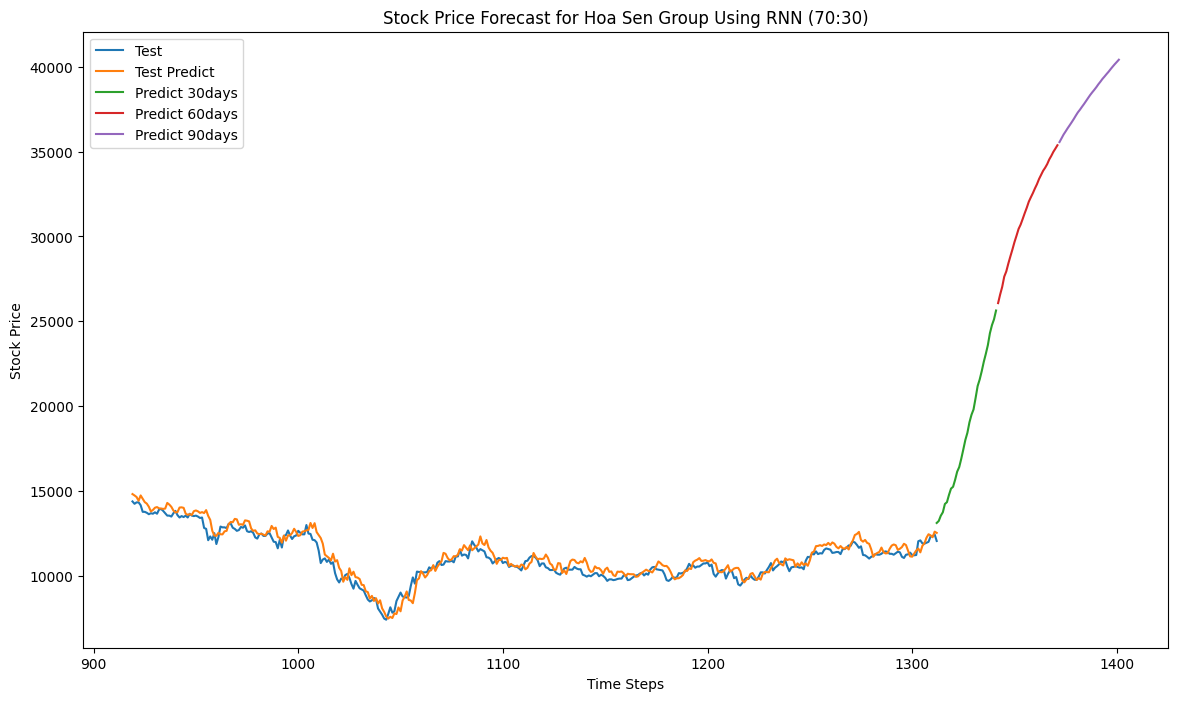

In [43]:
plt.figure(figsize=(14, 8))

# Vẽ dữ liệu kiểm tra (test_data)
test_data_index = pd.RangeIndex(start=train_size, stop=train_size + len(test_data), step=1)
plt.plot(test_data_index, scaler.inverse_transform(test_data), label='Test')

# Vẽ dữ liệu dự đoán cho tập kiểm tra (y_pred)
test_pred_index = pd.RangeIndex(start=train_size, stop=train_size + len(test_data), step=1)
plt.plot(test_pred_index, y_pred, label='Predict')

# Vẽ dự đoán 30 ngày
predict_index_30 = pd.RangeIndex(start=len(df)-1, stop=len(df) + 29, step=1)
plt.plot(predict_index_30, scaler.inverse_transform(lst_output_90[:30]), label='Predict30days')

# Vẽ dự đoán 60 ngày
predict_index_60 = pd.RangeIndex(start=len(df)+29, stop=len(df) + 59, step=1)
plt.plot(predict_index_60, scaler.inverse_transform(lst_output_90[30:60]), label='Predict60days')

# Vẽ dự đoán 90 ngày
predict_index_90 = pd.RangeIndex(start=len(df)+59, stop=len(df) + 89, step=1)
plt.plot(predict_index_90, scaler.inverse_transform(lst_output_90[60:]), label='Predict90days')

# Thêm chú thích và hiển thị đồ thị
plt.title('Stock Price Forecast for Hoa Sen Group Using RNN (70:30)')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend(['Test', 'Test Predict', 'Predict 30days', 'Predict 60days', 'Predict 90days'])
plt.show()

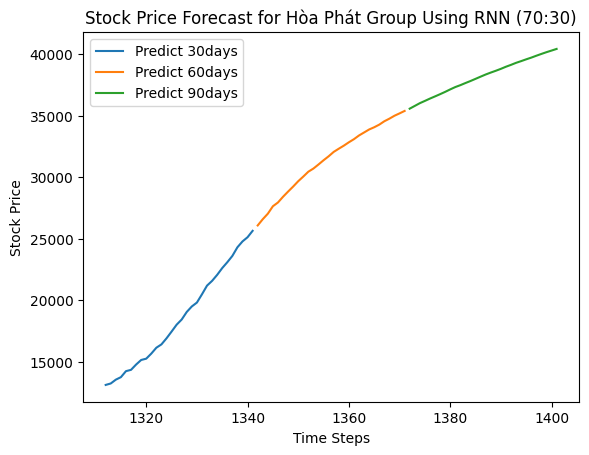

In [44]:
# Vẽ dự đoán 30 ngày
predict_index_30 = pd.RangeIndex(start=len(df)-1, stop=len(df) + 29, step=1)
plt.plot(predict_index_30, scaler.inverse_transform(lst_output_90[:30]), label='Predict30days')

# Vẽ dự đoán 60 ngày
predict_index_60 = pd.RangeIndex(start=len(df)+29, stop=len(df) + 59, step=1)
plt.plot(predict_index_60, scaler.inverse_transform(lst_output_90[30:60]), label='Predict60days')

# Vẽ dự đoán 90 ngày
predict_index_90 = pd.RangeIndex(start=len(df)+59, stop=len(df) + 89, step=1)
plt.plot(predict_index_90, scaler.inverse_transform(lst_output_90[60:]), label='Predict90days')

# Thêm chú thích và hiển thị đồ thị
plt.title('Stock Price Forecast for Hòa Phát Group Using RNN (70:30)')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend([ 'Predict 30days', 'Predict 60days', 'Predict 90days'])
plt.show()

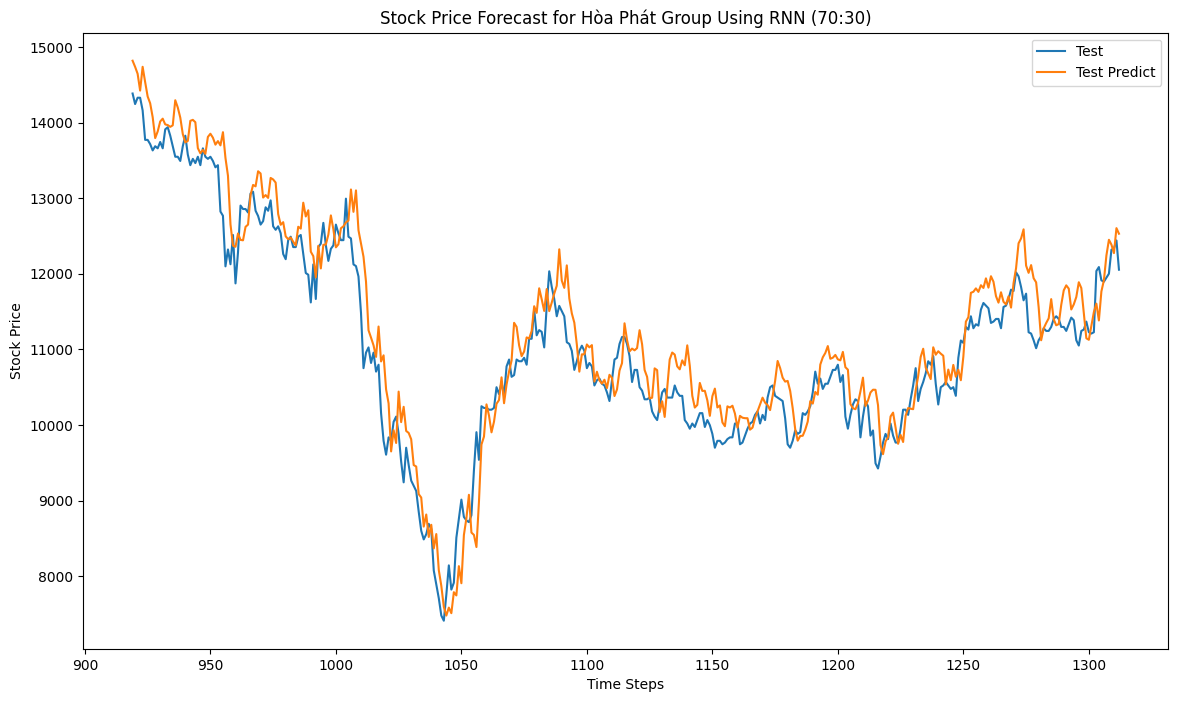

In [46]:
plt.figure(figsize=(14, 8))
# Vẽ dữ liệu kiểm tra (test_data)
test_data_index = pd.RangeIndex(start=train_size, stop=train_size + len(test_data), step=1)
plt.plot(test_data_index, scaler.inverse_transform(test_data), label='Test')

# Vẽ dữ liệu dự đoán cho tập kiểm tra (y_pred)
test_pred_index = pd.RangeIndex(start=train_size, stop=train_size + len(test_data), step=1)
plt.plot(test_pred_index, y_pred, label='Predict')

# Thêm chú thích và hiển thị đồ thị
plt.title('Stock Price Forecast for Hòa Phát Group Using RNN (70:30)')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend(['Test', 'Test Predict'])
plt.show()